In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import model_from_json

from keras import optimizers, losses, metrics

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

In [3]:
#Checking distribution of targets in training data
np.unique(train_Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

#### Selecting subset of 3 classes

In [4]:
def filterData(x, y, classes):
    x_filt = []
    y_filt = []
    for i in range(0, len(y)):
        if y[i] in classes:
            y_filt.append(y[i])
            x_filt.append(x[i])
    return np.array(x_filt), np.array(y_filt)

In [5]:
classes = [0, 1, 2]
train_X, train_Y = filterData(train_X, train_Y, classes)
test_X, test_Y = filterData(test_X, test_Y, classes)
testImages = test_X

#### Normalize the features

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

#### Splitting training set into training and validation sets

In [7]:
val_X = train_X[:4500]
train_X = train_X[4500:]
val_Y = train_Y[:4500]
train_Y = train_Y[4500:]

In [8]:
train_X.shape

(10500, 32, 32, 3)

In [9]:
train_Y.shape

(10500, 1)

In [10]:
val_X.shape

(4500, 32, 32, 3)

In [11]:
val_Y.shape

(4500, 1)

#### Vectorizing images

In [12]:
def vectorizeImages(imageData):
    return imageData.reshape(imageData.shape[0], np.prod(imageData.shape[1:]))

In [13]:
train_X = vectorizeImages(train_X)
train_X.shape

(10500, 3072)

In [14]:
val_X = vectorizeImages(val_X)
val_X.shape

(4500, 3072)

In [15]:
test_X = vectorizeImages(test_X)
test_X.shape

(3000, 3072)

#### Encoding target values

In [16]:
train_Y = to_categorical(train_Y)
train_Y.shape

(10500, 3)

In [17]:
val_Y = to_categorical(val_Y)
val_Y.shape

(4500, 3)

In [18]:
testlabels = test_Y
test_Y = to_categorical(test_Y)
test_Y.shape

(3000, 3)

#### Run this to load model from json file

In [19]:
json_file = open('task1model.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

model.load_weights("task1weights.h5")
print("Loaded model from disk")

model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

Loaded model from disk


#### Build Neural Network

In [34]:
inputDim = train_X.shape[1]
outputDim = train_Y.shape[1]
num_epochs = 150

nlayers = 2
nnodes = [64]

model = Sequential()
model.add(Dense(nnodes[0], input_dim=inputDim, activation='relu'))

for i in range(1, nlayers):  #Adding hidden layers
    model.add(Dense(nnodes[i-1], activation='relu'))
    
model.add(Dense(outputDim, activation='softmax')) # Adding output layer

In [35]:
model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

In [36]:
training = model.fit(train_X, train_Y,
          epochs=num_epochs,
          batch_size=512,
          validation_data=(val_X, val_Y))

print(training.history.keys())

Train on 10500 samples, validate on 4500 samples
Epoch 1/150
10500/10500 [==============================] - 1s 61us/step - loss: 1.6094 - accuracy: 0.3886 - val_loss: 1.0608 - val_accuracy: 0.3727
Epoch 2/150
10500/10500 [==============================] - 0s 40us/step - loss: 1.1272 - accuracy: 0.4454 - val_loss: 0.9356 - val_accuracy: 0.6442
Epoch 3/150
10500/10500 [==============================] - 0s 46us/step - loss: 1.0459 - accuracy: 0.5122 - val_loss: 0.9827 - val_accuracy: 0.4942
Epoch 4/150
10500/10500 [==============================] - 0s 44us/step - loss: 0.9771 - accuracy: 0.5470 - val_loss: 0.8363 - val_accuracy: 0.6602
Epoch 5/150
10500/10500 [==============================] - 0s 47us/step - loss: 0.9459 - accuracy: 0.5869 - val_loss: 0.9616 - val_accuracy: 0.5509
Epoch 6/150
10500/10500 [==============================] - 0s 46us/step - loss: 0.9111 - accuracy: 0.6012 - val_loss: 1.0135 - val_accuracy: 0.5047
Epoch 7/150
10500/10500 [==============================] - 0s 4

Epoch 56/150
10500/10500 [==============================] - 0s 42us/step - loss: 0.5757 - accuracy: 0.7650 - val_loss: 0.5878 - val_accuracy: 0.7593
Epoch 57/150
10500/10500 [==============================] - 0s 39us/step - loss: 0.5372 - accuracy: 0.7804 - val_loss: 0.6707 - val_accuracy: 0.7249
Epoch 58/150
10500/10500 [==============================] - 0s 39us/step - loss: 0.5511 - accuracy: 0.7733 - val_loss: 0.6015 - val_accuracy: 0.7580
Epoch 59/150
10500/10500 [==============================] - 0s 46us/step - loss: 0.5425 - accuracy: 0.7810 - val_loss: 0.6470 - val_accuracy: 0.7298
Epoch 60/150
10500/10500 [==============================] - 0s 43us/step - loss: 0.5208 - accuracy: 0.7891 - val_loss: 0.6454 - val_accuracy: 0.7416
Epoch 61/150
10500/10500 [==============================] - 0s 43us/step - loss: 0.5562 - accuracy: 0.7754 - val_loss: 0.6130 - val_accuracy: 0.7533
Epoch 62/150
10500/10500 [==============================] - 0s 45us/step - loss: 0.5376 - accuracy: 0.7830

Epoch 111/150
10500/10500 [==============================] - 0s 40us/step - loss: 0.4361 - accuracy: 0.8230 - val_loss: 0.6330 - val_accuracy: 0.7571
Epoch 112/150
10500/10500 [==============================] - 0s 41us/step - loss: 0.4529 - accuracy: 0.8164 - val_loss: 0.5730 - val_accuracy: 0.7736
Epoch 113/150
10500/10500 [==============================] - 0s 33us/step - loss: 0.4338 - accuracy: 0.8231 - val_loss: 0.5872 - val_accuracy: 0.7702
Epoch 114/150
10500/10500 [==============================] - 0s 37us/step - loss: 0.4439 - accuracy: 0.8182 - val_loss: 0.6249 - val_accuracy: 0.7607
Epoch 115/150
10500/10500 [==============================] - 0s 45us/step - loss: 0.4252 - accuracy: 0.8278 - val_loss: 0.6494 - val_accuracy: 0.7438
Epoch 116/150
10500/10500 [==============================] - 0s 46us/step - loss: 0.4491 - accuracy: 0.8226 - val_loss: 0.6895 - val_accuracy: 0.7231
Epoch 117/150
10500/10500 [==============================] - 0s 44us/step - loss: 0.4461 - accuracy:

In [49]:
# serialize model to JSON
model_json = model.to_json()
with open("task1model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("task1weights.h5")
print("Saved task 1 model to disk")

Saved task 1 model to disk


#### Plotting the training and Validation loss as function of epochs

In [37]:
val_loss = training.history['val_loss']
val_accuracy = training.history['val_accuracy']
loss = training.history['loss']
accuracy = training.history['accuracy']
epochs = range(1, len(accuracy)+1)

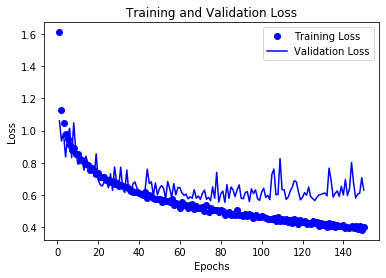

In [38]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the training and Validation accuracy as function of epochs

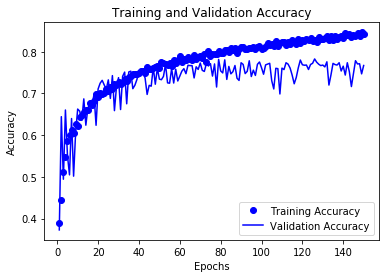

In [39]:
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
results = model.evaluate(test_X, test_Y)
print(results)

3000/3000 [==============================] - 0s 31us/step
[0.609482958316803, 0.7730000019073486]


#### Comparing the performance with a random classifier

In [41]:
testlabels_copy = np.copy(testlabels)
np.random.shuffle(testlabels)
hits_array = np.array(testlabels) == np.array(testlabels_copy)
print(np.sum(hits_array)/len(test_Y))


0.338


True class: [1]
Prediction: 1


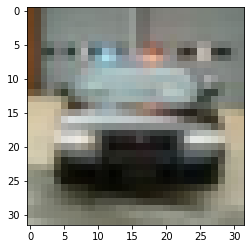

In [48]:
plt.imshow(testImages[12])
print("True class: " + str(testlabels[12]))
prediction = model.predict(np.array([test_X[12]]))
predClass = np.argmax(prediction)
print("Prediction: "+ str(predClass))